# Chilli Leaf Disease Classification

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 256, 256  # Maintain original resolution
batch_size = 32
num_classes = 6


In [5]:
train_dir = 'dataset/train'
val_dir = 'dataset/val'

In [6]:
# Efficient Data Loading
AUTOTUNE = tf.data.experimental.AUTOTUNE

def preprocess(image, label):
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

#training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical'  # Use categorical labels
).map(preprocess).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical'  # Use categorical labels
).map(preprocess).cache().prefetch(buffer_size=AUTOTUNE)

Found 6540 files belonging to 6 classes.
Found 1492 files belonging to 6 classes.


In [7]:
import os

# Use the correct path for the validation dataset
dataset_path = r'C:\Users\DELL\OneDrive\Desktop\chilli Leaf Disease Classification\chilli Leaf Disease Classification\dataset\train'

# Get the list of class names (subfolder names)
classes = os.listdir(dataset_path)
class_counts = {}

# Count images in each class
for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):  # Check if it's a directory
        num_images = len(os.listdir(class_folder))
        class_counts[class_name] = num_images

# Display the counts
print("Image count per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Get the list of class names (subfolder names)
classes = os.listdir(dataset_path)
class_counts = {}





Image count per class:
Anthracnose: 996
Bacterial_Leaf_Spot: 1026
Cercospora_Leaf_Spot: 988
Dead_Leaf: 979
healthy: 1536
Leaf_Curl_Disease: 1015


In [8]:
import os

# Use the correct path for the validation dataset
dataset_path = r'C:\Users\DELL\OneDrive\Desktop\chilli Leaf Disease Classification\chilli Leaf Disease Classification\dataset\val'

# Get the list of class names (subfolder names)
classes = os.listdir(dataset_path)
class_counts = {}

# Count images in each class
for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):  # Check if it's a directory
        num_images = len(os.listdir(class_folder))
        class_counts[class_name] = num_images

# Display the counts
print("Image count per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Get the list of class names (subfolder names)
classes = os.listdir(dataset_path)
class_counts = {}





Image count per class:
Anthracnose: 242
Bacterial_Leaf_Spot: 216
Cercospora_Leaf_Spot: 250
Dead_Leaf: 240
healthy: 330
Leaf_Curl_Disease: 214


In [9]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\DELL\OneDrive\Desktop\Chilli Leaf Disease Classification\Chilli Leaf Disease Classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,678 (127.65 KB)

 Trainable params: 32,678 (127.65 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Assuming train_dataset is a TensorFlow dataset
import tensorflow as tf

# Extract the labels from the dataset
labels = []
for _, label in train_dataset:
    labels.append(label.numpy())

# Flatten the list of labels and get the unique values
unique_labels = set([tuple(item) for sublist in labels for item in sublist])
num_classes = len(unique_labels)

print(f'Number of classes: {num_classes}')

Number of classes: 6


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example model
model = Sequential([
    # ...existing layers...
    Dense(6, activation='softmax')  # Adjust the number of neurons to match the number of classes
])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout added to reduce overfitting
    Dense(num_classes, activation='softmax')
])


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define separate augmentations
strong_aug = ImageDataGenerator(
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True
)

no_aug = ImageDataGenerator(rescale=1./255)  # No augmentation, only normalization

# Define function to apply different augmentations based on class
def custom_generator(directory, batch_size=32, target_size=(224, 224)):
    normal_gen = no_aug.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    augmented_gen = strong_aug.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    while True:
        x_batch, y_batch = normal_gen.next()  # Get normal images

        # Apply augmentation to only Class 1 (Bacterial Spot) & Class 4 (Healthy)
        for i in range(len(y_batch)):
            class_idx = y_batch[i].argmax()  # Get class index
            if class_idx in [1, 4]:  # If it's Bacterial Spot (1) or Healthy (4)
                x_batch[i], _ = augmented_gen.next()  # Replace with augmented image
        
        yield x_batch, y_batch  # Return modified batch

# Load train & validation sets
train_generator = custom_generator("dataset/train", batch_size=32)
val_generator = no_aug.flow_from_directory("dataset/val", target_size=(224,224), batch_size=32, class_mode='categorical')


Found 1492 images belonging to 6 classes.


In [13]:
# Ensure the final layer has the correct number of neurons
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.3873 - loss: 1.4219
Epoch 1: val_loss improved from inf to 0.66684, saving model to best_model.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 65s 308ms/step - accuracy: 0.3882 - loss: 1.4202 - val_accuracy: 0.7373 - val_loss: 0.6668
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.7731 - loss: 0.5739
Epoch 2: val_loss improved from 0.66684 to 0.63385, saving model to best_model.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 57s 278ms/step - accuracy: 0.7731 - loss: 0.5738 - val_accuracy: 0.7158 - val_loss: 0.6338
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.7734 - loss: 0.5142
Epoch 3: val_loss improved from 0.63385 to 0.49594, saving model to best_model.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 52s 252ms/step - accuracy: 0.7735 - loss: 0.5141 - val_accuracy: 0.7929 - val_loss: 0.4959
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.8069 - loss: 0.4732
Epoch 4: val_loss improved from 0.495

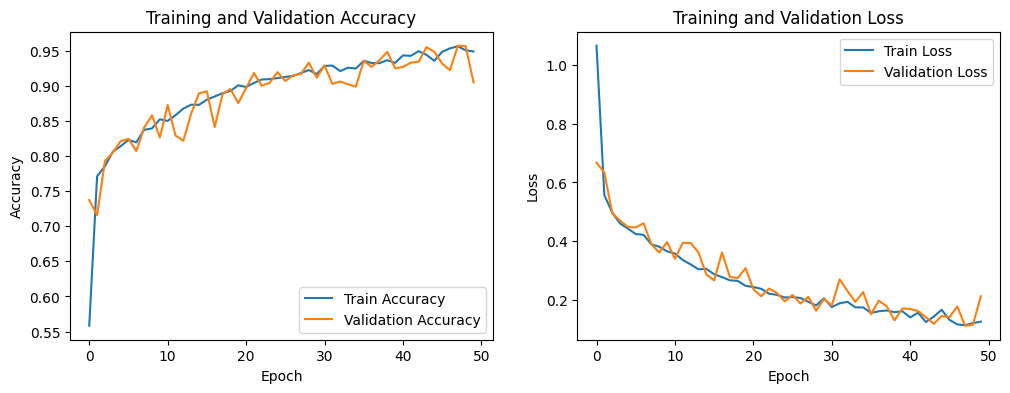

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

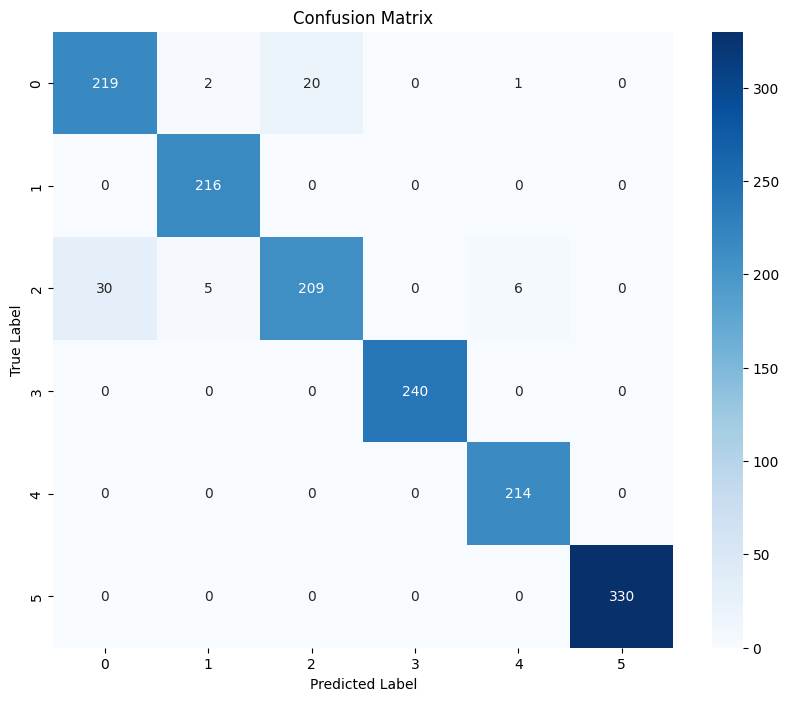

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming history is your training history object
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('training_validation_accuracy.png')  # Save the accuracy plot

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('training_validation_loss.png')  # Save the loss plot

plt.show()

# Confusion Matrix
val_labels = []
val_preds = []

for images, labels in val_dataset:
    val_labels.extend(np.argmax(labels.numpy(), axis=1))
    val_preds.extend(np.argmax(model.predict(images), axis=1))

conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot

plt.show()

In [15]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate on validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation accuracy: {val_acc:.2f}")

# Get the true labels and predictions
val_labels = []
val_predictions = []

for images, labels in val_dataset:
    preds = model.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))
    val_labels.extend(np.argmax(labels.numpy(), axis=1))

# Compute precision, recall, and F1 score
val_precision = precision_score(val_labels, val_predictions, average='weighted')
val_recall = recall_score(val_labels, val_predictions, average='weighted')
val_f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation F1 score: {val_f1:.2f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9535 - loss: 0.1239
Validation accuracy: 0.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1

In [16]:
model.save('model/light_chilli.h5')  # Recommended format


In [17]:
from tensorflow.keras.models import load_model

model = load_model('model/light_chilli.h5')

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = r"C:\Users\DELL\Downloads\chilli.jpg"
  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size

# Convert image to array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's expected input shape (batch size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalize pixel values (if your model expects it)
img_array /= 255.0  # Only do this if the model was trained with normalized data

# Make prediction
predictions = model.predict(img_array)

# Print the predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[[8.7806908e-09 3.9974790e-08 1.0532242e-13 1.9263837e-36 3.1786398e-28
  1.0000000e+00]]


In [20]:
import os
import random
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('light_chilli.h5')

# Path to the validation directory
val_dir = 'dataset/val'

# Get list of disease folders
disease_folders = os.listdir(val_dir)

# Class names
class_names = {
    0: 'Anthracnose',
    1: 'Bacterial_Leaf_Spot',
    2: 'Cercospora_Leaf_Spot',
    3: 'Dead_Leaf',
    4: 'Leaf_Curl_Disease',
    5: 'healthy'
   
}

# Iterate 10 times
for _ in range(10):
    print(f"Iteration {_ + 1}:")
    # Choose a random disease folder
    random_folder_name = random.choice(disease_folders)
    # Get list of images in the random disease folder
    images = os.listdir(os.path.join(val_dir, random_folder_name))
    # Choose a random image from the folder
    random_image = random.choice(images)
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        os.path.join(val_dir, random_folder_name, random_image),
        target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize
    # Predict disease label using the model
    predictions = model.predict(img_array)
    predicted_label = predictions.argmax(axis=-1)[0]
    # Update class_names dictionary if predicted_label is not in the dictionary
    if predicted_label not in class_names:
        class_names[predicted_label] = f'Class {predicted_label}'
    # Get the class name from the folder name
    actual_label = random_folder_name.split('___')[-1]
    # Print the predicted label and actual label
    print(f"Predicted: {class_names[predicted_label]}, Actual: {actual_label}")
    print()

Iteration 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Predicted: Dead_Leaf, Actual: Dead_Leaf

Iteration 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted: Cercospora_Leaf_Spot, Actual: Cercospora_Leaf_Spot

Iteration 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted: Bacterial_Leaf_Spot, Actual: healthy

Iteration 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted: Bacterial_Leaf_Spot, Actual: Bacterial_Leaf_Spot

Iteration 5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: Dead_Leaf, Actual: Dead_Leaf

Iteration 6:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted: Bacterial_Leaf_Spot, Actual: healthy

Iteration 7:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: Leaf_Curl_Disease, Actual: Bacterial_Leaf_Spot

Iteration 8:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: Cercospora_Leaf_Spot, Actual: Cercospora_Leaf_Spot

Iteration 9:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: Bacterial_Leaf_Spot, Actual: healthy

Iteration 10:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted: Le

In [21]:
import os
import random
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('light_chilli.h5')

# Image size (should match training size)
img_height, img_width = 224, 224  

# Path to the validation directory
val_dir = 'dataset/val'

# Get list of disease folders
disease_folders = os.listdir(val_dir)

# Class names mapping (ensure it includes all classes)
class_names = {
    0: 'Anthracnose',
    1: 'Bacterial_Leaf_Spot',
    2: 'Cercospora_Leaf_Spot',
    3: 'Dead_Leaf',
    4: 'Leaf_Curl_Disease',
    5: 'healthy'
    # Add more classes here if needed
}

# Run predictions for 10 random images
for _ in range(10):
    print(f"Iteration {_ + 1}:")
    
    # Choose a random disease folder
    random_folder_name = random.choice(disease_folders)
    
    # Get list of images in the selected folder
    folder_path = os.path.join(val_dir, random_folder_name)
    images = os.listdir(folder_path)
    
    # Choose a random image
    random_image = random.choice(images)
    
    # Load and preprocess the image
    img_path = os.path.join(folder_path, random_image)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize

    # Predict disease label
    predictions = model.predict(img_array)
    predicted_label = predictions.argmax(axis=-1)[0]

    # Ensure predicted label exists in class names
    predicted_class = class_names.get(predicted_label, f'Class {predicted_label}')

    # Get the actual class name from the folder name
    actual_label = random_folder_name  # Assuming folder names are class names

    # Print results
    print(f"Predicted: {predicted_class}, Actual: {actual_label}")
    print()


Iteration 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted: Bacterial_Leaf_Spot, Actual: Bacterial_Leaf_Spot

Iteration 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: Bacterial_Leaf_Spot, Actual: healthy

Iteration 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: Bacterial_Leaf_Spot, Actual: healthy

Iteration 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted: Cercospora_Leaf_Spot, Actual: Cercospora_Leaf_Spot

Iteration 5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: Bacterial_Leaf_Spot, Actual: Bacterial_Leaf_Spot

Iteration 6:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted: Dead_Leaf, Actual: Dead_Leaf

Iteration 7:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted: Anthracnose, Actual: Cercospora_Leaf_Spot

Iteration 8:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted: Bacterial_Leaf_Spot, Actual: healthy

Iteration 9:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: Anthracnose, Actual: healthy

Iteration 10:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted: Bacterial

In [22]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,551 (127.16 KB)

 Trainable params: 32,549 (127.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
print(model)


<Sequential name=sequential_2, built=True>


In [24]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer}")


Layer 0: <Conv2D name=conv2d_3, built=True>
Layer 1: <MaxPooling2D name=max_pooling2d_3, built=True>
Layer 2: <Conv2D name=conv2d_4, built=True>
Layer 3: <MaxPooling2D name=max_pooling2d_4, built=True>
Layer 4: <Conv2D name=conv2d_5, built=True>
Layer 5: <MaxPooling2D name=max_pooling2d_5, built=True>
Layer 6: <GlobalAveragePooling2D name=global_average_pooling2d_1, built=True>
Layer 7: <Dense name=dense_3, built=True>
Layer 8: <Dense name=dense_4, built=True>


In [25]:
num_layers = len(model.layers)
print("Total layers:", num_layers)


Total layers: 9
